In [1]:
import matplotlib.pyplot as plt
import LightPipes as lp
import numpy as np

from focal_spot_pattern import create_gaussian_mask
from propagation import fresnel_propagation

In [2]:
grid_size = 50e-6
grid_dimension = 500
lambda_ = 2.75e-10
I0 = 1e6

### Simple case using a Gaussian beam

In [3]:
F_in = lp.Begin(grid_size, lambda_, grid_dimension)
F_in = lp.GaussAperture(F_in, 10e-6)
F_in.field = np.sqrt(I0) * F_in.field

x = np.linspace(-25e-6, 25e-6, 500)
y = np.linspace(-25e-6, 25e-6, 500)
X,Y = np.meshgrid(x,y)

E_in = np.sqrt(I0)*create_gaussian_mask(X, Y, diameter=20e-6)

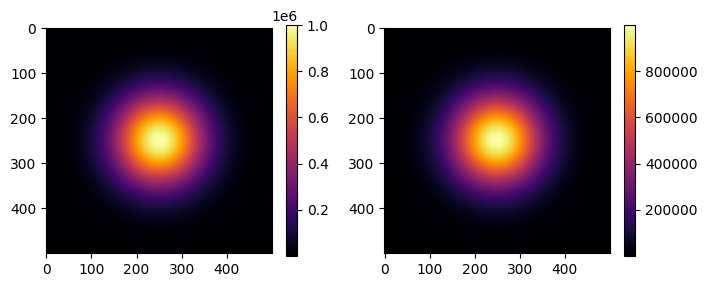

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_in.field)**2, cmap='inferno')
im2=ax[1].imshow(np.abs(E_in)**2, cmap='inferno')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)

### Fresnel propagation

In [5]:
F_out = lp.Fresnel(F_in, 1)
print(np.abs(F_out.field)**2)

E_out, _, _ = fresnel_propagation(E_in, lambda_, 1, 0.1e-6)

[[11.98533302 12.04001857 12.11346938 ... 12.09807556 12.00527431
  11.93237381]
 [12.04001857 12.09495363 12.16873958 ... 12.15327552 12.06005084
  11.98681773]
 [12.11346938 12.16873958 12.24297565 ... 12.22741726 12.13362386
  12.05994398]
 ...
 [12.09807556 12.15327552 12.22741726 ... 12.21187864 12.11820443
  12.04461818]
 [12.00527431 12.06005084 12.13362386 ... 12.11820443 12.02524877
  11.95222699]
 [11.93237381 11.98681773 12.05994398 ... 12.04461818 11.95222699
  11.87964861]]
[[5.75762836e-22 3.61821214e-22 3.92708456e-22 ... 6.59682745e-22
  2.79581579e-22 6.45198055e-22]
 [2.12929307e-22 5.31838014e-15 2.12728587e-14 ... 4.78598829e-14
  2.12730853e-14 5.31342812e-15]
 [4.14192251e-22 2.12719603e-14 8.50787798e-14 ... 1.91526732e-13
  8.50786962e-14 2.12731101e-14]
 ...
 [4.11935041e-23 4.78700600e-14 1.91507181e-13 ... 4.31059405e-13
  1.91521123e-13 4.78786602e-14]
 [1.72587388e-24 2.12734922e-14 8.50803229e-14 ... 1.91503636e-13
  8.50728150e-14 2.12762088e-14]
 [3.8013

In [6]:
print(np.abs(E_out)**2)

[[7.61339287e-03 4.78441274e-03 5.19283908e-03 ... 8.72307762e-03
  3.69694650e-03 8.53154452e-03]
 [2.81559414e-03 7.03256878e+04 2.81294000e+05 ... 6.32857956e+05
  2.81296996e+05 7.02602066e+04]
 [5.47692233e-03 2.81282119e+05 1.12500866e+06 ... 2.53258489e+06
  1.12500755e+06 2.81297324e+05]
 ...
 [5.44707493e-04 6.32992529e+05 2.53232637e+06 ... 5.69995907e+06
  2.53251072e+06 6.33106251e+05]
 [2.28214728e-05 2.81302376e+05 1.12502906e+06 ... 2.53227949e+06
  1.12492979e+06 2.81338299e+05]
 [5.02658852e-03 7.03155069e+04 2.81269245e+05 ... 6.33156112e+05
  2.81312592e+05 7.02733245e+04]]


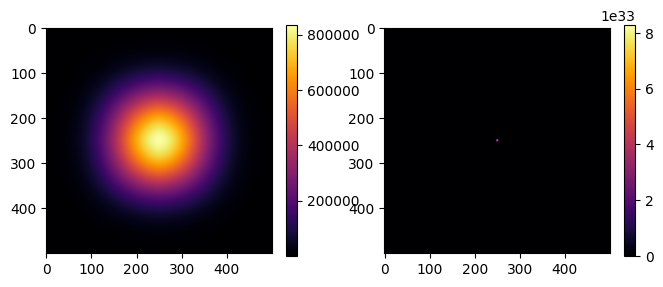

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))

im1=ax[0].imshow(np.abs(F_out.field)**2, cmap='inferno')
im2=ax[1].imshow(np.abs(E_out)**2, cmap='inferno')

fig.colorbar(im1, ax=ax[0], shrink=0.75)
fig.colorbar(im2, ax=ax[1], shrink=0.75)